![NCIA](NCIA_Images/start.png)

# Projeto: Manutenção Preventiva em Máquinas de Usinagem com Machine Learning

### Contexto:

A manutenção preventiva é uma abordagem essencial em ambientes industriais, pois busca reduzir falhas inesperadas, aumentar a vida útil dos equipamentos e melhorar a eficiência do processo produtivo. Com o avanço da Indústria 4.0, técnicas de **Machine Learning (ML)** vêm sendo aplicadas para prever falhas de forma antecipada, possibilitando decisões mais assertivas sobre inspeções e trocas de componentes.

Neste projeto, utilizamos um **dataset sintético** inspirado em processos de **usinagem**, especificamente em uma **máquina de fresagem real**. A fresagem é um dos processos mais comuns da indústria, responsável pela remoção controlada de material e conformação de peças. Seu desempenho é fortemente influenciado por variáveis operacionais, ambientais e de desgaste da ferramenta, que impactam diretamente a **qualidade do produto**, a **vida útil do equipamento** e a **ocorrência de falhas**.

O dataset contém **10.000 registros** e **14 variáveis**, incluindo parâmetros como temperatura ambiente, temperatura de processo, velocidade de rotação, torque aplicado e desgaste da ferramenta. Também possui um indicador binário de falha, que será a **variável alvo** para os modelos de ML. Ao representar condições típicas de operação de máquinas de usinagem, esse conjunto de dados possibilita estudar como diferentes fatores interagem no processo produtivo e como podem ser utilizados para **antecipar falhas**, apoiar a **manutenção preventiva** e aumentar a confiabilidade do sistema.

<img src="NCIA_Images/usin.png" alt="USIN" width="400">

### Sobre o Dataset:
- **Origem**: Sintético, baseado em um modelo real de fresagem. (ideial para um primeiro trabalho)
- **Tamanho**: 10.000 amostras, 14 variáveis.  
- **Referência**:  
  S. Matzka, *Explainable Artificial Intelligence for Predictive Maintenance Applications*, AI4I 2020.

### Variáveis principais:
- **UID**: Identificador único da amostra.  
- **Product ID**: Código do produto (variantes L, M, H = qualidade baixa, média, alta).  
- **Type**: Categoria do produto (L, M, H).  
- **Air Temperature [K]**: Temperatura ambiente.  
- **Process Temperature [K]**: Temperatura do processo.  
- **Rotational Speed [rpm]**: Velocidade de rotação da ferramenta.  
- **Torque [Nm]**: Torque aplicado.  
- **Tool Wear [min]**: Desgaste da ferramenta em minutos.  
- **Machine Failure (0/1)**: Indicador binário de falha.

### Modos de falha:
- **TWF**: Falha por desgaste da ferramenta.  
- **HDF**: Falha por dissipação de calor.  
- **PWF**: Falha de potência.  
- **OSF**: Falha por sobrecarga.  
- **RNF**: Falha aleatória.  

- O campo **`machine failure`** é a **variável alvo** para os modelos de ML.  
- O dataset não informa diretamente o tipo de falha, apenas se houve falha ou não.

### Objetivo do Trabalho:
- Explorar e entender o comportamento das variáveis do dataset.  
- Construir modelos de Machine Learning capazes de antever possiveis **falhas na máquina**.  
- Avaliar diferentes algoritmos e métricas de classificação.  
- Discutir como a aplicação prática de ML pode melhorar estratégias de **manutenção preventiva**.

---

### 1.import das bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

### 2.leitura/inspeção da base de dados

In [2]:
df_mac_2 = pd.read_csv("ai4i2020.csv")

In [3]:
df_mac_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [4]:
df_mac_2.shape

(10000, 14)

In [5]:
df_mac_2.isna().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [6]:
df_mac_2.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

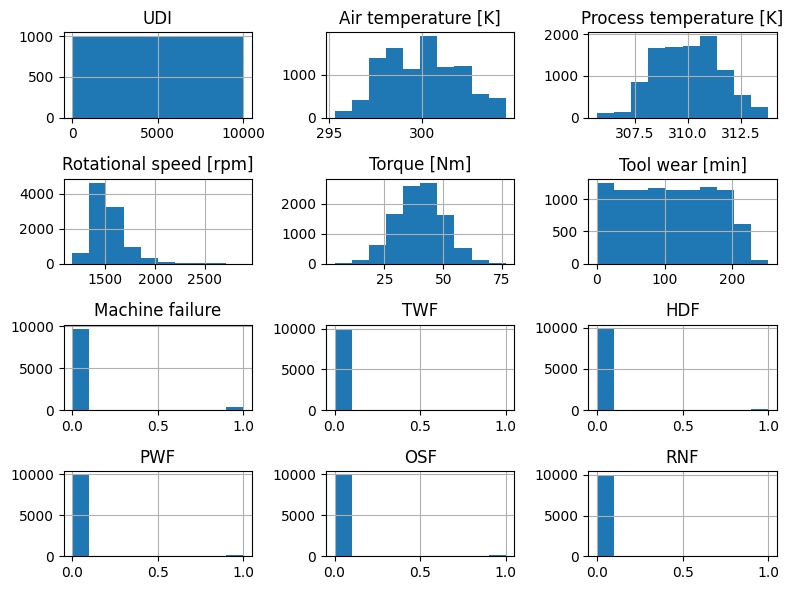

In [7]:
axes = df_mac_2.hist(figsize=(8, 6))
plt.tight_layout()
plt.show()

In [8]:
ordinal_encoder = OrdinalEncoder(categories=[['L', 'M', 'H']])
df_mac_2['Type_ordinal'] = ordinal_encoder.fit_transform(df_mac_2[['Type']])
df_mac_2[['Type', 'Type_ordinal']].head()

,Type,Type_ordinal
0,M,1.0
1,L,0.0
2,L,0.0
3,L,0.0
4,L,0.0


In [9]:
"""removemos as variaveis abaixo que nao fazem sentindo para a etapa de modelagem e EDA """

df_mac_2.drop(["Type","Product ID","UDI","TWF", "PWF", "OSF", "RNF", "HDF"], axis=1, inplace=True)

In [10]:
df_mac_2.columns

Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'Type_ordinal'],
      dtype='object')

### 3.análise exploratória dos dados (EDA)

#### Introdução:

**Usinagem e Impacto das Variáveis no Processo**

A **usinagem** é um conjunto de processos industriais que envolve a remoção controlada de material de uma peça para atingir dimensões, formas e acabamentos específicos. Entre os processos mais comuns estão a fresagem, torneamento, furação e retificação. A eficiência e a qualidade da usinagem dependem de múltiplos fatores, incluindo parâmetros operacionais da máquina, condições ambientais e o estado das ferramentas utilizadas.

No contexto deste projeto, o foco está em uma **máquina de fresagem**, cujas operações são influenciadas por diversas variáveis medidas ao longo do processo:

- **Velocidade de rotação (Rotational Speed [rpm])**: Determina a rapidez com que a ferramenta corta o material. Velocidades inadequadas podem aumentar o desgaste da ferramenta ou gerar defeitos na peça.  
- **Torque [Nm]**: Reflete a força aplicada pela máquina durante o corte. Flutuações inesperadas podem indicar sobrecarga ou falha mecânica iminente.  
- **Desgaste da ferramenta (Tool Wear [min])**: Representa o tempo de uso da ferramenta. Um desgaste excessivo aumenta a chance de falhas por quebra ou baixa qualidade no acabamento.  
- **Temperatura do processo (Process Temperature [K])**: Altas temperaturas podem afetar a dureza do material, reduzir a vida útil da ferramenta e provocar falhas térmicas.  
- **Temperatura ambiente (Air Temperature [K])**: Condições ambientais extremas podem interferir no desempenho da máquina e na estabilidade dimensional das peças.  
- **Tipo e qualidade do produto (Type e Product ID)**: Diferentes materiais ou graus de qualidade podem exigir ajustes nos parâmetros de usinagem para evitar falhas.  

O **monitoramento dessas variáveis** é essencial para antecipar falhas e planejar intervenções preventivas, reduzindo paradas inesperadas e aumentando a produtividade. Neste trabalho, essas informações serão utilizadas como **entradas para modelos de Machine Learning**, com o objetivo de prever falhas na máquina antes que ocorram, contribuindo para uma manutenção mais eficiente e segura.

In [11]:
df_mac_2.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Type_ordinal
0,298.1,308.6,1551,42.8,0,0,1.0
1,298.2,308.7,1408,46.3,3,0,0.0
2,298.1,308.5,1498,49.4,5,0,0.0
3,298.2,308.6,1433,39.5,7,0,0.0
4,298.2,308.7,1408,40.0,9,0,0.0


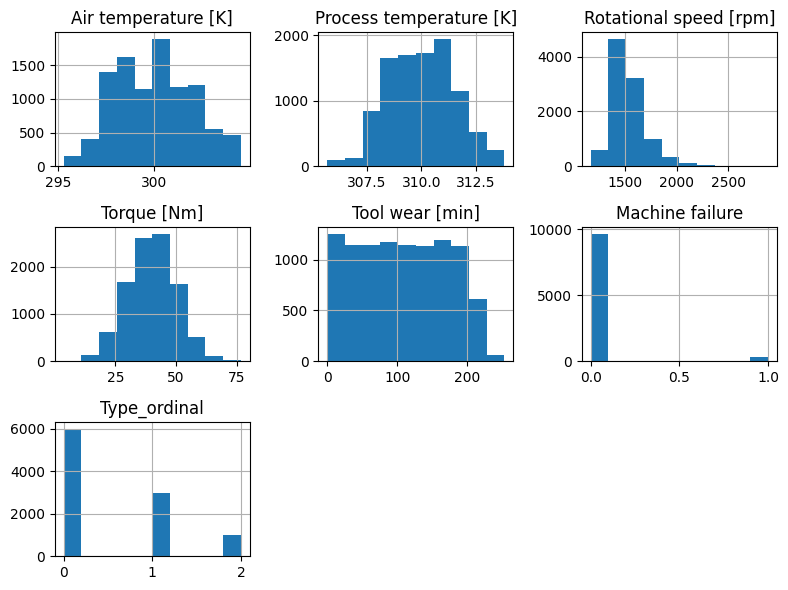

In [12]:
axes = df_mac_2.hist(figsize=(8, 6))
plt.tight_layout()
plt.show()

In [13]:
df_mac_2.describe().loc["mean":"max"].loc[:, "Air temperature [K]":"Tool wear [min]"]

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
mean,300.004930,310.005560,1538.776100,39.986910,107.951000
std,2.000259,1.483734,179.284096,9.968934,63.654147
min,295.300000,305.700000,1168.000000,3.800000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000


#### contagem da variavel alvo

In [14]:
df_mac_2["Machine failure"].value_counts()

Machine failure
0    9661
1     339
Name: count, dtype: int64

#### distribuicao das falhas por tipo de máquina:

In [15]:
pivot_prop = df_mac_2.pivot_table(
    index='Type_ordinal',
    values='Machine failure',   
    aggfunc='mean'            
)
pivot_prop = pivot_prop*100

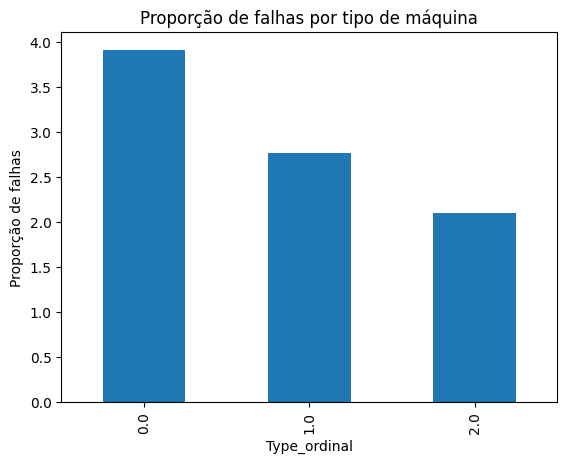

In [16]:
pivot_prop.plot(kind='bar', legend=False)
plt.ylabel("Proporção de falhas")
plt.title("Proporção de falhas por tipo de máquina")
plt.show()

#### correlação entre variáveis contínuas:

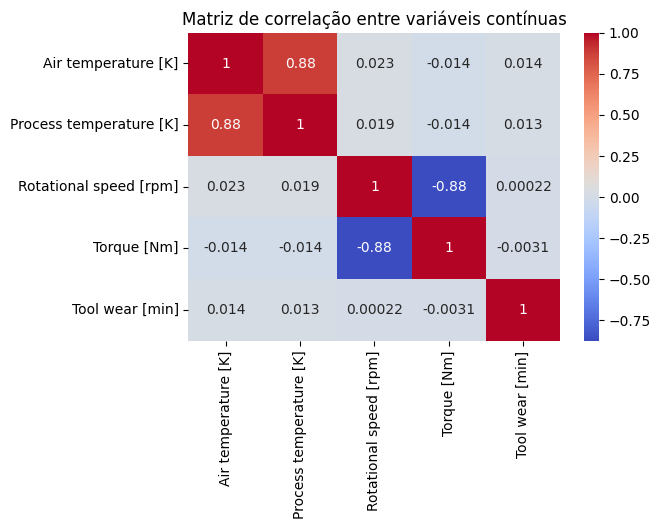

In [17]:
cont_vars = ['Air temperature [K]', 'Process temperature [K]',
             'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

plt.figure(figsize=(6,4))
sns.heatmap(df_mac_2[cont_vars].corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de correlação entre variáveis contínuas')
plt.show()

#### estudo Torque vs Speed:

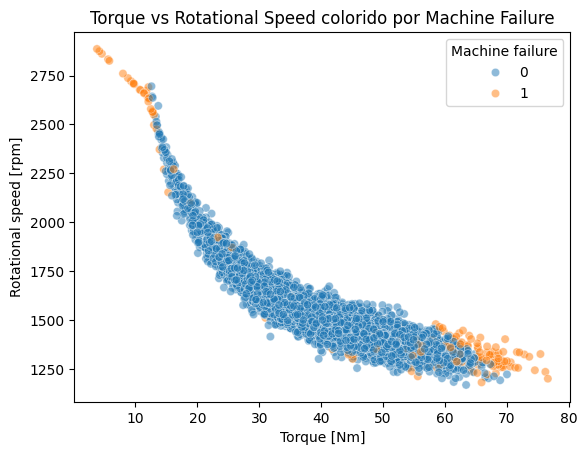

In [18]:
sns.scatterplot(x='Torque [Nm]', y='Rotational speed [rpm]',
                hue='Machine failure', data=df_mac_2, alpha=0.5)
plt.title('Torque vs Rotational Speed colorido por Machine Failure')
plt.show()

#### estudo Air Temp vs Process Temp:

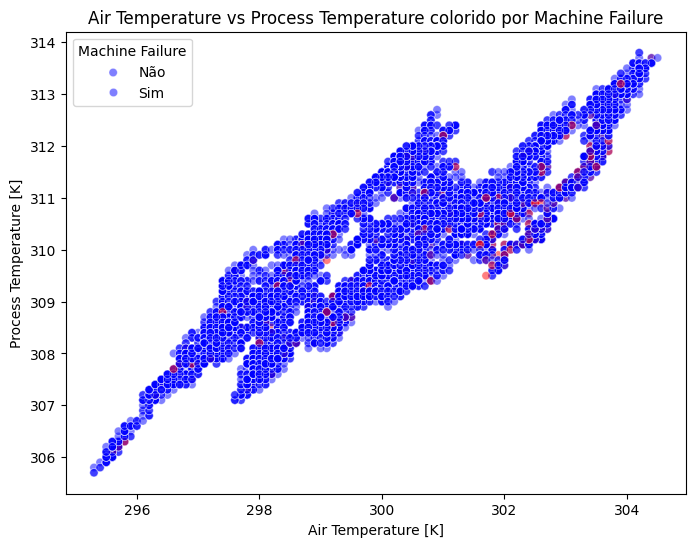

In [19]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Air temperature [K]',
    y='Process temperature [K]',
    hue='Machine failure',
    data=df_mac_2,
    palette={0:'blue', 1:'red'},
    alpha=0.5
)
plt.title('Air Temperature vs Process Temperature colorido por Machine Failure')
plt.xlabel('Air Temperature [K]')
plt.ylabel('Process Temperature [K]')
plt.legend(title='Machine Failure', labels=['Não', 'Sim'])
plt.show()

#### estudo relacao entre variaveis Torque, Speed, Delta Temp, Tool Wear, Machine Failure:

In [20]:
df_mac_2['Delta Temp [K]'] = df_mac_2['Process temperature [K]'] - df_mac_2['Air temperature [K]']

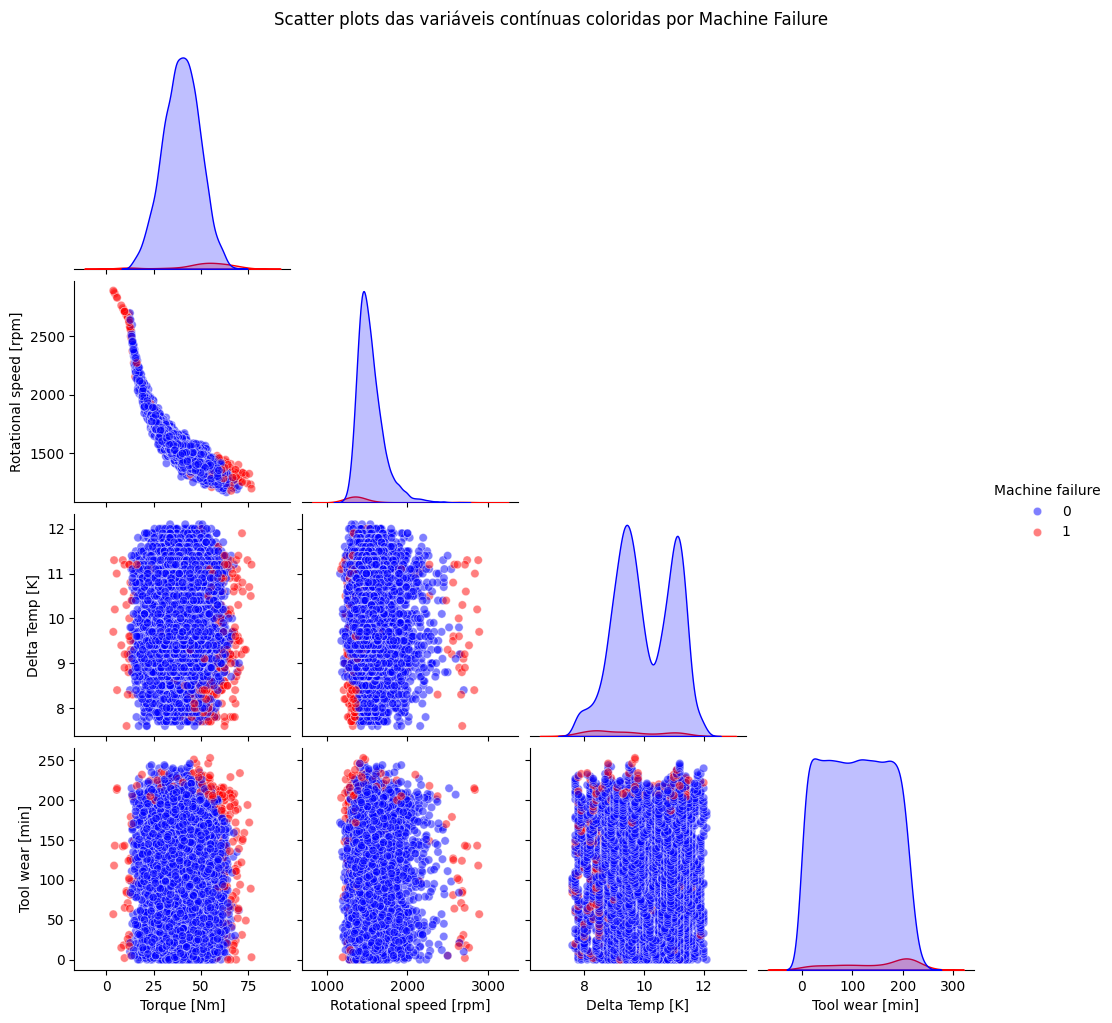

In [21]:
vars_cont = ['Torque [Nm]', 'Rotational speed [rpm]', 'Delta Temp [K]', 'Tool wear [min]', 'Machine failure']

sns.pairplot(df_mac_2[vars_cont], 
             hue='Machine failure', 
             palette={0:'blue', 1:'red'}, 
             corner=True,   # Apenas metade inferior para não repetir
             plot_kws={'alpha':0.5})
plt.suptitle('Scatter plots das variáveis contínuas coloridas por Machine Failure', y=1.02)
plt.show()

In [22]:
labels = ['Nova', 'Semi nova', 'Desgastada', 'Muito desgastada']
df_mac_2['Tool_wear_cat'] = pd.qcut(df_mac_2['Tool wear [min]'], q=4, labels=labels)

df_mac_2['Tool_wear_cat'].value_counts()

Tool_wear_cat
Nova                2529
Semi nova           2499
Muito desgastada    2496
Desgastada          2476
Name: count, dtype: int64

In [23]:
pivot_tool = df_mac_2.pivot_table(
    index='Tool_wear_cat',
    values='Machine failure',
    aggfunc=['count', 'sum', 'mean'],
    observed=False  # evita o FutureWarning
)
pivot_tool.columns = ['Total', 'Falhas', 'Proporcao_falhas']
pivot_tool

,Total,Falhas,Proporcao_falhas
Tool_wear_cat,,,
Nova,2529,55,0.021748
Semi nova,2499,59,0.023609
Desgastada,2476,52,0.021002
Muito desgastada,2496,173,0.069311


In [24]:
df_mac_2.drop(['Tool_wear_cat'], axis=1, inplace=True)

#### conclusões da EDA

#### distribuição do alvo (Machine failure)
- O dataset é **altamente desbalanceado**: a maioria das operações não apresenta falha (`0`), enquanto falhas (`1`) são raras.  
- Isso indica que técnicas como **estratificação, reamostragem** ou métricas adequadas (**F1, AUC**) serão importantes na modelagem.

#### tool wear
- Existe uma relação clara: quanto maior o **desgaste da ferramenta**, maior a chance de falha.  
- A categorização em **Nova, Semi nova, Desgastada e Muito desgastada** deixa o padrão visualmente evidente.  
- Também é reforçado no **scatter plot com Torque**: Tool wear alto + Torque alto → mais falhas.

#### torque × Rotational Speed
- Scatter plots mostram que falhas ocorrem mais frequentemente em **combinações de Torque e Rotational Speed altos**.  
- Isso está alinhado com o modo de falha por **overstrain (OSF)** ou **power failure (PWF)**.

#### delta Temp [K] (Process Temp – Air Temp)
- Falhas tendem a ocorrer quando a diferença entre **Process temperature** e **Air temperature** é pequena, o que faz sentido para o modo de falha **heat dissipation failure (HDF)**.

#### tipo de produto (Type)
- Produtos H, M e L apresentam **limites de Tool wear diferentes antes de falhar**, mostrando que a categoria do produto influencia no risco de falha.  
- Essa variável **ordinal** pode ser usada diretamente em modelos de ML.

#### insight geral
- Variáveis contínuas do processo (**Torque, Rotational Speed, Delta Temp, Tool Wear**) mostram **padrões claros de risco**.  
- **Scatter plots** e **pairplots** permitem identificar **regiões críticas**, facilitando **monitoramento e manutenção preventiva**.


### 4.divisão da base de dados:

In [25]:
df_mac_2 = df_mac_2[["Type_ordinal", "Delta Temp [K]", "Rotational speed [rpm]", "Torque [Nm]", "Tool wear [min]", "Machine failure"]]

In [26]:
df_mac_2.head()

,Type_ordinal,Delta Temp [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,1.0,10.5,1551,42.8,0,0
1,0.0,10.5,1408,46.3,3,0
2,0.0,10.4,1498,49.4,5,0
3,0.0,10.4,1433,39.5,7,0
4,0.0,10.5,1408,40.0,9,0


In [27]:
X = df_mac_2.drop(columns=['Machine failure'])
y = df_mac_2['Machine failure']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42, 
    stratify=y  # garante representatividade da variável alvo
)

print("Proporção de falhas no conjunto completo:")
print(y.value_counts(normalize=True))
print("\nProporção de falhas no treino:")
print(y_train.value_counts(normalize=True))
print("\nProporção de falhas no teste:")
print(y_test.value_counts(normalize=True))

Proporção de falhas no conjunto completo:
Machine failure
0    0.9661
1    0.0339
Name: proportion, dtype: float64

Proporção de falhas no treino:
Machine failure
0    0.966143
1    0.033857
Name: proportion, dtype: float64

Proporção de falhas no teste:
Machine failure
0    0.966
1    0.034
Name: proportion, dtype: float64


### treinamento dos modelos:

| Algoritmo              | Descrição                                                                                 | Probabilidades    | Complexidade (0-5) | Observações |
|------------------------|-------------------------------------------------------------------------------------------|-------------------|--------------------|-------------|
| Regressão Logística    | Modelo linear usado para classificação binária. Calcula a probabilidade de cada classe.   | Sim               | 2                  | Simples, interpretável, boa linha de base. |
| SGD Classifier         | Otimização via gradiente descendente estocástico. Pode usar diferentes loss functions.    | Depende do *loss* | 3                  | Probabilidades só com `loss='log'` ou calibragem; rápido para grandes datasets. |
| SVC (Support Vector)   | Classificador baseado em Support Vector Machines. Usa kernels para separação não linear.  | Não direto        | 4                  | Probabilidades via `probability=True` e Platt scaling; custoso para datasets grandes. |
| Decision Tree          | Árvore de decisão que divide recursivamente o espaço das features.                        | Sim               | 2                  | Intuitiva e interpretável, mas pode overfit se muito profunda. |


![NCIA](NCIA_Images/end.png)